In [1]:
import snap
import pandas as pd
import numpy
import matplotlib.pyplot as plt 
%matplotlib inline

In [1]:
from datetime import datetime

In [35]:
%reload_ext autoreload

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
from code.data import Data

In [4]:
data = Data("lastfm-dataset-1K\userid-timestamp-artid-artname-traid-traname.tsv")

Skipping line 2120260: expected 6 fields, saw 8

Skipping line 2446318: expected 6 fields, saw 8

Skipping line 11141081: expected 6 fields, saw 8

Skipping line 11152099: expected 6 fields, saw 12
Skipping line 11152402: expected 6 fields, saw 8

Skipping line 11882087: expected 6 fields, saw 8

Skipping line 12902539: expected 6 fields, saw 8
Skipping line 12935044: expected 6 fields, saw 8

Skipping line 17589539: expected 6 fields, saw 8



In [22]:
id_0 = data.create_experiment_data(21, 7, datetime(2009, 5, 5), 0)

The modularity of the network is 0.999593


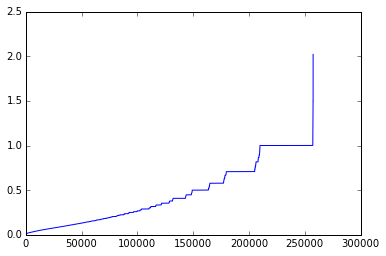

In [58]:
from code.clustering import TrackClustering
training_data = data.get_training_data(id_0)
clustering = TrackClustering(training_data, 60, 0.5)
clustering.run(plot_similarities=True)

In [59]:
id_1 = data.create_experiment_data(7, 7, datetime(2009, 5, 5), 1)

==== Model user_previous_tracks ====
[(0.21600399066345843, 0.13156664802161866, 0.09558685129242929), (0.13677031592259078, 0.25133194916235846, 0.11000690664269702), (0.11539153917941852, 0.30392384534947803, 0.11460842087132823), (0.15699045536593415, 0.22091059189200987, 0.10806059179065662), (0.0856962702843786, 0.3673396710683349, 0.1043834506457405), (0.1807368067484137, 0.18588114368108657, 0.10747813405911963), (0.07298050922897134, 0.4133814535589635, 0.09743145894619708), (0.06433181201889396, 0.44401462026431626, 0.09124337660574033)]
(0.21600399066345843, 0.13677031592259078, 0.11539153917941852, 0.15699045536593415, 0.0856962702843786, 0.1807368067484137, 0.07298050922897134, 0.06433181201889396)


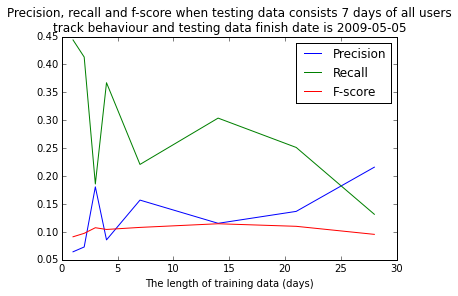

[(0.1261252738231769, 0.31947502444988873, 0.13840168183720308), (0.10795996294810581, 0.37410088344684533, 0.1353821220261576), (0.09442506702840185, 0.41664760028740416, 0.12623090311310042), (0.1971954958928247, 0.1562906915649061, 0.11848752858337076), (0.16784672533669098, 0.23697589405379452, 0.14161392093331798), (0.24454081004788444, 0.08188236700073637, 0.08171725671179493), (0.21066631740451983, 0.12508275276338324, 0.10335747734419289), (0.18631930573638278, 0.1935999491279029, 0.12713121692835422)]
(0.1261252738231769, 0.10795996294810581, 0.09442506702840185, 0.1971954958928247, 0.16784672533669098, 0.24454081004788444, 0.21066631740451983, 0.18631930573638278)


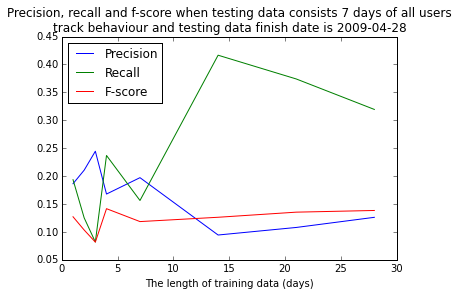

{(14, 7, datetime.datetime(2009, 4, 28, 0, 0)): (0.1261252738231769, 0.31947502444988873, 0.13840168183720308), (21, 7, datetime.datetime(2009, 4, 28, 0, 0)): (0.10795996294810581, 0.37410088344684533, 0.1353821220261576), (1, 7, datetime.datetime(2009, 5, 5, 0, 0)): (0.21600399066345843, 0.13156664802161866, 0.09558685129242929), (4, 7, datetime.datetime(2009, 5, 5, 0, 0)): (0.13677031592259078, 0.25133194916235846, 0.11000690664269702), (7, 7, datetime.datetime(2009, 5, 5, 0, 0)): (0.11539153917941852, 0.30392384534947803, 0.11460842087132823), (28, 7, datetime.datetime(2009, 4, 28, 0, 0)): (0.09442506702840185, 0.41664760028740416, 0.12623090311310042), (3, 7, datetime.datetime(2009, 5, 5, 0, 0)): (0.15699045536593415, 0.22091059189200987, 0.10806059179065662), (3, 7, datetime.datetime(2009, 4, 28, 0, 0)): (0.1971954958928247, 0.1562906915649061, 0.11848752858337076), (14, 7, datetime.datetime(2009, 5, 5, 0, 0)): (0.0856962702843786, 0.3673396710683349, 0.1043834506457405), (7, 7, d

In [94]:
from code.experiments import Experiment
training_lengths = [28,21,14,7,4,3,2,1]
testing_lengths = [7]
#testing_finish_dates = [datetime(2009, 5, 5), datetime(2009, 4, 28), datetime(2009, 1, 1)]
testing_finish_dates = [datetime(2009, 5, 5), datetime(2009, 4, 28)]

experiment = Experiment(training_lengths, testing_lengths, testing_finish_dates)
experiment.run(data, 1, as_graph=True)

In [128]:
# Extract four weeks data
import time
all_listened_smaller = all_listened[(all_listened['timestamp'] >= '2009-04-07 00:00:00') & 
                                    (all_listened['timestamp'] < time.time())]

In [6]:
# Separate the dataset into training (first 3 weeks) and testing (last week)
begin_training = '2009-04-07 00:00:00'
finish_training = '2009-04-28 00:00:00'
begin_testing = '2009-04-28 00:00:00'
finish_testing = '2009-05-05 00:00:00'
all_listened_training = all_listened_smaller[(all_listened_smaller['timestamp'] >= begin_training) & 
                                             (all_listened_smaller['timestamp'] < finish_training)]
all_listened_testing = all_listened_smaller[(all_listened_smaller['timestamp'] >= begin_testing) & 
                                            (all_listened_smaller['timestamp'] < finish_testing)]

In [118]:
finish_training = '2009-04-21 00:00:00'
all_listened_training_2_weeks = all_listened_smaller[(all_listened_smaller['timestamp'] >= '2009-04-07 00:00:00') & 
                                                     (all_listened_smaller['timestamp'] < finish_training)]
all_listened_training_1_week = all_listened_smaller[(all_listened_smaller['timestamp'] >= '2009-04-14 00:00:00') & 
                                                     (all_listened_smaller['timestamp'] < finish_training)]
all_listened_training_4_days = all_listened_smaller[(all_listened_smaller['timestamp'] >= '2009-04-17 00:00:00') & 
                                                     (all_listened_smaller['timestamp'] < finish_training)]
all_listened_training_2_days = all_listened_smaller[(all_listened_smaller['timestamp'] >= '2009-04-19 00:00:00') & 
                                                     (all_listened_smaller['timestamp'] < finish_training)]
all_listened_training_3_days = all_listened_smaller[(all_listened_smaller['timestamp'] >= '2009-04-18 00:00:00') & 
                                                     (all_listened_smaller['timestamp'] < finish_training)]
all_listened_training_1_day = all_listened_smaller[(all_listened_smaller['timestamp'] >= '2009-04-20 00:00:00') & 
                                                     (all_listened_smaller['timestamp'] < finish_training)]
begin_testing = '2009-04-21 00:00:00'
finish_testing = '2009-04-28 00:00:00'
all_listened_testing = all_listened_smaller[(all_listened_smaller['timestamp'] >= begin_testing) & 
                                            (all_listened_smaller['timestamp'] < finish_testing)]

In [60]:
all_listened[all_listened['user_id'] == 'user_000001']

,user_id,timestamp,track_id,track_name
10,user_000001,2009-05-04 13:06:09,f7c1f8f8-b935-45ed-8fc8-7def69d92a10,The Last Emperor (Theme)
12,user_000001,2009-05-04 12:55:34,475d4e50-cebb-4cd0-8cd4-c3df97987962,Tibetan Dance (Version)
14,user_000001,2009-05-03 15:48:25,dc394163-2b78-4b56-94e4-658597a29ef8,"Boy, Boy, Boy (Switch Remix)"
15,user_000001,2009-05-03 15:37:56,340d9a0b-9a43-4098-b116-9f79811bd508,Crocodile (Innervisions Orchestra Mix)
16,user_000001,2009-05-03 15:14:53,0b04407b-f517-4e00-9e6a-494795efc73e,Ninna Nanna In Blu (Raw Deal Remix)
17,user_000001,2009-05-03 15:10:18,4e78efc4-e545-47af-9617-05ff816d86e2,Elysian Fields
18,user_000001,2009-05-03 15:04:31,fb51d2c4-cc69-4128-92f5-77ec38d66859,Planetary Deadlock
19,user_000001,2009-05-03 14:56:25,4277434f-e3c2-41ae-9ce3-23fd157f9347,Good Morning Love Coffee Is Ready
20,user_000001,2009-05-03 14:50:51,1151b040-8022-4965-96d2-8a4605ce456c,Deadly Species
21,user_000001,2009-05-03 14:46:29,f78c95a8-9256-4757-9a9f-213df5c6854e,Cold Fusion


In [64]:
u1 = all_listened[all_listened['user_id'] == 'user_000001'].values

In [65]:
u1

array([['user_000001', Timestamp('2009-05-04 13:06:09'),
        'f7c1f8f8-b935-45ed-8fc8-7def69d92a10', 'The Last Emperor (Theme)'],
       ['user_000001', Timestamp('2009-05-04 12:55:34'),
        '475d4e50-cebb-4cd0-8cd4-c3df97987962', 'Tibetan Dance (Version)'],
       ['user_000001', Timestamp('2009-05-03 15:48:25'),
        'dc394163-2b78-4b56-94e4-658597a29ef8',
        'Boy, Boy, Boy (Switch Remix)'],
       ..., 
       ['user_000001', Timestamp('2009-04-21 14:55:12'),
        'e86a28e6-1afb-40dc-92fe-5f04e9ccc92d', 'Classylassie'],
       ['user_000001', Timestamp('2009-04-21 14:27:03'),
        'f7c1f8f8-b935-45ed-8fc8-7def69d92a10', 'The Last Emperor (Theme)'],
       ['user_000001', Timestamp('2009-04-21 14:16:27'),
        '475d4e50-cebb-4cd0-8cd4-c3df97987962', 'Tibetan Dance (Version)']], dtype=object)

In [80]:
times = []
cluster_ids = []
for _, time, track_id, _ in u1:
    cluster_ids.append(tracks_map[track_id]['cluster_id'])
    times.append(time)

In [135]:
cluster_freq = {}
for c in cluster_ids:
    if c in cluster_freq:
        cluster_freq[c] += 1
    else:
        cluster_freq[c] = 1
        
print cluster_freq

{17539: 2, 14089: 1, 9867: 3, 10562: 3, 11028: 7, 7065: 36, 8484: 17, 4648: 2, 4905: 15, 5804: 57, 4014: 33, 8640: 2, 17090: 14, 7375: 2, 6227: 13, 12504: 2, 2403: 23, 12648: 1, 491: 63, 20465: 4, 9843: 2, 13695: 1}


In [136]:
from datetime import datetime

window_in_mins = (datetime.strptime(finish, "%Y-%m-%d 00:00:00") - datetime.strptime(begin, "%Y-%m-%d 00:00:00")).days * 24.0

In [137]:
for f in cluster_freq:
    cluster_freq[f] = window_in_mins/cluster_freq[f] 

In [138]:
[(c, cluster_freq[c]) for c in sorted(cluster_freq, key=lambda x: cluster_freq[x])]

[(491, 5.333333333333333),
 (5804, 5.894736842105263),
 (7065, 9.333333333333334),
 (4014, 10.181818181818182),
 (2403, 14.608695652173912),
 (8484, 19.764705882352942),
 (4905, 22.4),
 (17090, 24.0),
 (6227, 25.846153846153847),
 (11028, 48.0),
 (20465, 84.0),
 (9867, 112.0),
 (10562, 112.0),
 (17539, 168.0),
 (4648, 168.0),
 (8640, 168.0),
 (7375, 168.0),
 (12504, 168.0),
 (9843, 168.0),
 (14089, 336.0),
 (12648, 336.0),
 (13695, 336.0)]

In [161]:
len(clusters[13695])

1

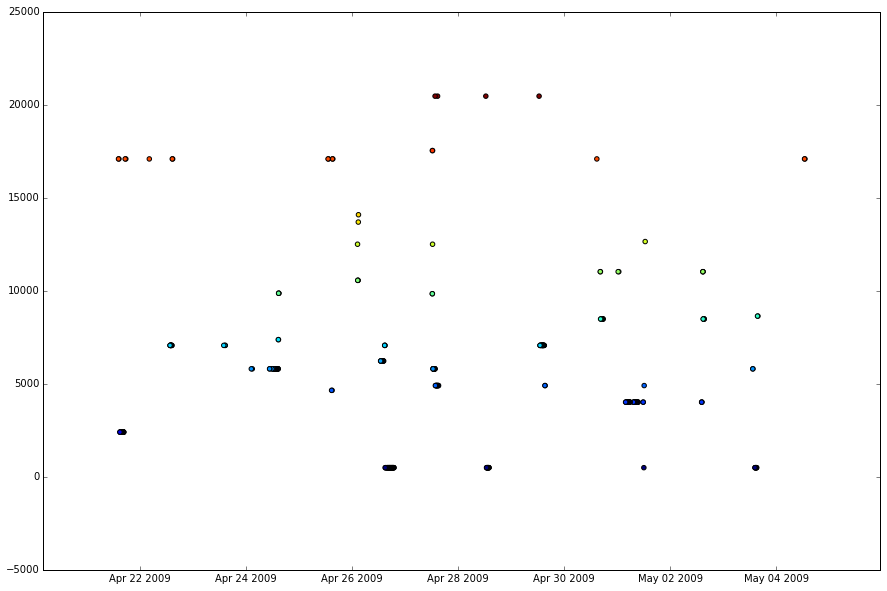

In [117]:
plt.figure(figsize=(15,10), dpi=1000)
axes = plt.gca()
#axes.set_xlim(['2009-05-04 13:06:09','2009-04-21 14:16:27'])
plt.scatter(times, cluster_ids, c=cluster_ids)

In [45]:
print len(CmtyV)
print len([x for x in CmtyV if len(x) > 1])

23237
9860


In [46]:
l = [len(a) for a in CmtyV]

In [47]:
l.sort()
l[-10:]

[245, 248, 280, 287, 291, 300, 304, 342, 344, 355]

In [48]:
s = [a for a in CmtyV if len(a) == 5]

In [49]:
for a in s[0]:
    print labels[a]

Shiola
Loathsome
Splinters Through A Straw
Catching Feathers
Death Salvation


In [22]:
# 4 different methods to predict what the user is going to listen in the next 7 days
# 1. Predict all songs in the corpus
# 2. Predict only the songs that the user has listened so far
# 3. Predict 5 songs that the user listened for most often in the past
# 4. Predict n songs that the user listened for most often in the past where n is the average number of songs listened per week
# 5. Start using clusters

In [110]:
# Function to compute precision, recall and f-score
def score(predicted_tracks, true_tracks, model):
    total_users = len(predicted_tracks)
    total_precision = 0
    total_recall = 0
    total_f_score = 0
    for user_id in predicted_tracks:
        user_predicted_tracks = predicted_tracks[user_id]
        user_true_tracks = [] if not user_id in true_tracks else true_tracks[user_id]
        TP = len(numpy.intersect1d(user_predicted_tracks, user_true_tracks)) # how many predicted items for user are relevant?
        #TP = len(user_tracks)
        TP_FP = len(user_predicted_tracks) # how many items were predicted in total for user?
        TP_FN = len(user_true_tracks) # how many relevant tracks were in total for user?
        user_precision = TP*1.0/TP_FP if not TP_FP == 0 else 1
        user_recall = TP*1.0/TP_FN if not TP_FN == 0 else 1
        total_precision += user_precision # how many selected tracks are relevant for user?
        total_recall += user_recall # how many relevant tracks are selected?
        if not (user_precision == 0 and user_recall == 0):
            total_f_score += 2*user_precision*user_recall/(user_precision+user_recall)
    print "========== Model %s ==========" % model
    print "Model precision: %s" % (total_precision/total_users)
    print "Model recall: %s" % (total_recall/total_users)
    print "F1 score: %s" % (total_f_score/total_users)

In [78]:
# 1. Predict all songs in the corpus
unique_tracks = all_listened_training[['track_id']].drop_duplicates().values

from collections import defaultdict
final = defaultdict(list)
unique_tracks_test = all_listened_testing[['user_id', 'track_id']].drop_duplicates().values
for idx, value in unique_tracks_test:
    final[idx].append(value)

finalList = numpy.array([v for k, v in final.iteritems()])

score(unique_tracks, finalList, "1")

========== Model 1 ==========
Model precision: 0.000581625002678
Model recall: 1.0
F1 score: 0.00116257382335


In [111]:
# 2. Predict only the songs that the user has listened so far (during 3 weeks)

# Get all songs listened by each user for each training and testing sets
def get_new(listened):
    user_track_map = {}
    for user, listened_track in listened:
        if user in user_track_map:
            user_track_map[user].append(listened_track)
        else:
            user_track_map[user] = [listened_track]
    return user_track_map

score(get_new(all_listened_training[['user_id', 'track_id']].drop_duplicates().values), 
      get_new(all_listened_testing[['user_id', 'track_id']].drop_duplicates().values), "2")

========== Model 2 ==========
Model precision: 0.072980509229
Model recall: 0.413381453559
F1 score: 0.0974314589462


40% of users listened songs are the same as from previous weeks

In [119]:
# 3. Predict only the songs that the user has listened so far (during 2 weeks)

score(get_new(all_listened_training_2_weeks[['user_id', 'track_id']].drop_duplicates().values), 
      get_new(all_listened_testing[['user_id', 'track_id']].drop_duplicates().values), "3")

========== Model 3 ==========
Model precision: 0.126125273823
Model recall: 0.31947502445
F1 score: 0.138401681837


In [120]:
# 4. Predict only the songs that the user has listened so far (during 1 weeks)

score(get_new(all_listened_training_1_week[['user_id', 'track_id']].drop_duplicates().values), 
      get_new(all_listened_testing[['user_id', 'track_id']].drop_duplicates().values), "4")

========== Model 4 ==========
Model precision: 0.167846725337
Model recall: 0.236975894054
F1 score: 0.141613920933


In [121]:
# 5. Predict only the songs that the user has listened so far (during 4 days)

score(get_new(all_listened_training_4_days[['user_id', 'track_id']].drop_duplicates().values), 
      get_new(all_listened_testing[['user_id', 'track_id']].drop_duplicates().values), "5")

========== Model 5 ==========
Model precision: 0.186319305736
Model recall: 0.193599949128
F1 score: 0.127131216928


In [122]:
# 6. Predict only the songs that the user has listened so far (during 3 days)

score(get_new(all_listened_training_3_days[['user_id', 'track_id']].drop_duplicates().values), 
      get_new(all_listened_testing[['user_id', 'track_id']].drop_duplicates().values), "6")

========== Model 6 ==========
Model precision: 0.197195495893
Model recall: 0.156290691565
F1 score: 0.118487528583


In [123]:
# 7. Predict only the songs that the user has listened so far (during 2 days)

score(get_new(all_listened_training_2_days[['user_id', 'track_id']].drop_duplicates().values), 
      get_new(all_listened_testing[['user_id', 'track_id']].drop_duplicates().values), "7")

========== Model 7 ==========
Model precision: 0.210666317405
Model recall: 0.125082752763
F1 score: 0.103357477344


In [124]:
# 8. Predict only the songs that the user has listened so far (during 1 day)

score(get_new(all_listened_training_1_day[['user_id', 'track_id']].drop_duplicates().values), 
      get_new(all_listened_testing[['user_id', 'track_id']].drop_duplicates().values), "8")

========== Model 8 ==========
Model precision: 0.244540810048
Model recall: 0.0818823670007
F1 score: 0.0817172567118
